# Advanced Regression - House Price Prediction 

# Problem Statement

The US housing firm `Surprise Housing` intends to expand into the Australian market. Employing data analytics, the company aims to acquire properties below market value and sell them at a profit. They seek to determine:

1. The key variables influencing house prices.
2. The accuracy of these variables in predicting house prices. 

To aid in this analysis, a consulting firm has compiled an extensive dataset encompassing various types of properties across the American market through market surveys.

# Approach

> Develop a regression model incorporating regularization techniques to forecast the true market value of potential properties and make informed investment decisions.
> Identify the optimal lambda values for both ridge and lasso regression methods.
> Management will utilize this model to comprehend the nuanced relationship between property prices and various influencing factors.
> By leveraging insights from the model, the firm can tailor its strategies to focus on areas with high potential returns.
> This model serves as a valuable tool for management to grasp the pricing dynamics within a new market landscape.

# 1. Reading and Understanding Data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import sklearn
from sklearn import metrics
from sklearn.preprocessing import scale, MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV, KFold   
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
house_df = pd.read_csv('train.csv')
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# analysing dataset

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_df.shape

(1460, 81)

#### Inference: The dataset comprises 1460 rows and 81 columns and has many empty rows

In [6]:
# describing the data
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# 2. Data Cleaning

## i. Duplicate Check

In [7]:
print("The total number of duplicate rows is: " , house_df.duplicated().sum())

The total number of duplicate rows is:  0


## ii. NULL value check

In [8]:
pd.set_option('display.max_rows', None)
100*house_df.isnull().mean().sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

#### Inference: We will eliminate columns with more than 30% missing values since imputing them wouldn't significantly contribute to our analysis, as the majority of the values would remain unchanged.

In [9]:
# analysing the columns to be removed
deleted_cols=[]
for i in house_df.columns:
    if(house_df[i].isnull().mean()*100>=30.00):
        deleted_cols.append(i)
        
print("These columns are to be removed from the dataset : ", deleted_cols)

These columns are to be removed from the dataset :  ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
# drop the identified columns
house_df.drop(deleted_cols,axis=1,inplace=True)
print("The size of the data frame after removing null columns" , house_df.shape)

The size of the data frame after removing null columns (1460, 75)


## iii. Data Manipulation

In [11]:
# replace NA with none
null_with_meaning = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    house_df[i].fillna("none", inplace=True)

In [12]:
# replace nul with median value
house_df["LotFrontage"].fillna(house_df["LotFrontage"].median(), inplace=True)
house_df["MasVnrArea"].fillna(house_df["MasVnrArea"].median(), inplace=True)
house_df["GarageYrBlt"].fillna(house_df["GarageYrBlt"].median(), inplace=True)

In [13]:
# replace electrical column with mode
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

In [14]:
# re-check for null values
100 * house_df.isnull().mean().sort_values(ascending=False)

Id               0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
Heating          0.0
MSSubClass       0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig    

#### Inference: there are no missing values in the dataset

In [15]:
# drop columns which doesn't help in the analysis
house_df.drop('Id',axis='columns', inplace=True)

In [16]:
print("The size of the data frame after data cleaning" , house_df.shape)

The size of the data frame after data cleaning (1460, 74)


## iv. Rounding Decimals and Creating new columns ( Derived Variables )

In [17]:
house_df = house_df.round(decimals = 3)

In [18]:
# creating total area in square foot column
house_df['Total_sqr_footage'] = (house_df['BsmtFinSF1'] + house_df['BsmtFinSF2'] + house_df['1stFlrSF'] + house_df['2ndFlrSF'])

In [19]:
# creating derived column for total number of bathrooms
house_df['Total_Bathrooms'] = (house_df['FullBath'] + (0.5 * house_df['HalfBath']) + house_df['BsmtFullBath'] + (0.5 * house_df['BsmtHalfBath']))

In [20]:
# creating derived column for total porch area 
house_df['Total_porch_sf'] = (house_df['OpenPorchSF'] + house_df['3SsnPorch'] + house_df['EnclosedPorch'] + house_df['ScreenPorch'] + house_df['WoodDeckSF'])


In [21]:
# creating a new column to determine the age of the property
house_df['Total_Age']=house_df['YrSold']- house_df['YearBuilt']
house_df['Garage_age'] = house_df['YrSold'] - house_df['GarageYrBlt']
house_df['Remodel_age'] = house_df['YrSold'] - house_df['YearRemodAdd']

In [22]:
# dropping the extra columns
extra_cols = ['YearRemodAdd','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
house_df.drop(extra_cols,axis=1,inplace=True)

In [23]:
print("The size of the data frame after deriving new columns" , house_df.shape)

The size of the data frame after deriving new columns (1460, 65)


## v. Checking on unique data

In [24]:
for column in house_df.columns:
    print(column, "\n")
    print(house_df[column].value_counts(), "\n\n")

MSSubClass 

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64 


MSZoning 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 


LotFrontage 

LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
24.0      19
68.0      19
64.0      19
73.0      18
55.0      17
63.0      17
72.0      17
79.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
43.0      12
67.0      12
40.0      12
57.0      12
76.0      11
34.0      10
53.0      10
86.0      10
92.0      10
88.0      10
44.0       9
84.0       9
35.0       9
62.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120

TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
816     13
768     12
728     12
894     11
780     11
848     11
832     10
630      9
756      9
952      9
936      8
1056     8
1008     7
384      7
600      7
840      7
483      7
720      7
796      6
884      6
1392     6
858      6
1362     6
876      6
896      5
928      5
1144     5
970      5
1728     5
684      5
990      5
992      5
960      5
1092     5
1440     5
793      5
686      5
1494     4
735      4
660      4
910      4
747      4
1208     4
1050     4
1314     4
784      4
980      4
924      4
689      4
880      4
1078     4
1064     4
847      4
698      4
1080     4
546      4
764      4
616      4
1029     4
1057     4
1188     4
1026     4
804      4
588      4
855      4
1580     3
732      3
833      3
729      3
856      3
1063     3
1010     3
1258     3
1196     3
907      3
798      3
1248     3
560      3
1626     3
547      3
1216     3
1073     3
948      3
264      3
806      

Total_sqr_footage
1456     8
1788     7
1040     6
1510     6
1909     5
1680     5
1928     5
1800     5
1632     5
1709     4
1250     4
1812     4
2050     4
1932     4
2848     4
1571     4
1302     4
1656     4
1596     4
2150     4
1986     4
2199     4
1368     4
1573     4
1824     4
1344     4
1959     4
1772     3
1533     3
2286     3
1180     3
1727     3
1904     3
1792     3
1839     3
2880     3
2492     3
2240     3
1535     3
1458     3
882      3
1634     3
2291     3
1860     3
1576     3
1416     3
1872     3
1294     3
1804     3
1224     3
2112     3
2042     3
1716     3
968      3
1520     3
1961     3
1578     3
1412     3
2890     3
1720     3
2295     3
1600     3
2196     3
1092     3
1472     3
1795     3
1489     3
1296     3
1494     3
1484     3
2070     3
1428     3
1502     3
1902     3
2020     3
2094     3
1718     3
1640     3
1514     2
1446     2
2403     2
2653     2
2158     2
3752     2
1362     2
2167     2
2056     2
1666     2
1306     2
864

#### Inference: We notice that numerous variables or columns exhibit a single value that occurs most frequently. We opt to discard the columns where the highest frequency is equal to or exceeds 90% of the total dataset size, which is calculated as 1460 rows multiplied by 0.90.

In [25]:
# identify the columns to be dropped
drop_cols = []
for column in house_df.columns:
    if house_df[column].value_counts().max() >= 1460*0.90:
        drop_cols.append(column)
print(drop_cols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [26]:
# removing the columns identified
house_df.drop(drop_cols,axis=1,inplace=True)

In [27]:
print("The size of the data frame after removing unique columns" , house_df.shape)

The size of the data frame after removing unique columns (1460, 50)


# 3. Exploratory Data Analysis ( EDA )

In [28]:
# diving to numerical and categorical columns
categorical_cols = []
numeric_cols = []
for i in house_df.columns :
    if house_df[i].dtype == "object":
        categorical_cols.append(i)
    else:
        numeric_cols.append(i)
print("There are " ,len(categorical_cols), "categorical columns which are : ", categorical_cols, "\n\n")
print("There are" , len(numeric_cols), "numerical columns which are : ", numeric_cols)

There are  26 categorical columns which are :  ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition'] 


There are 24 numerical columns which are :  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


## i. Univariate Analysis

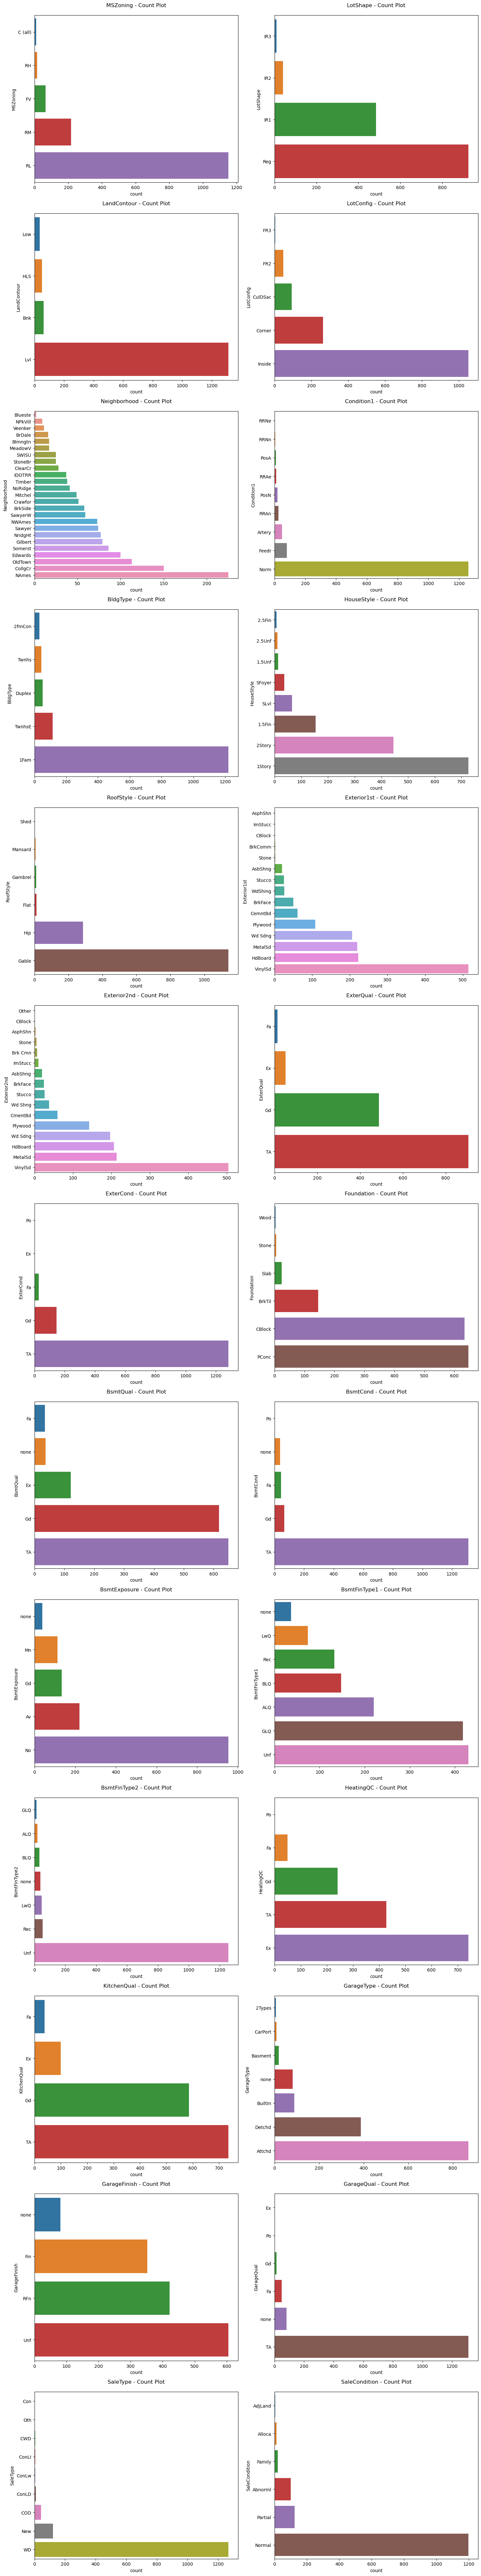

In [29]:
# plotting all categorical columns

plt.figure(figsize=(15, 110))
for index, column in enumerate(categorical_cols, start=1):
    plt.subplot(18, 2, index)
    sns.countplot(y=house_df[column], order=house_df[column].value_counts().sort_values().index)
    plt.title(f"{column} - Count Plot\n")
plt.tight_layout()
plt.show()

## ii. Checking Outliers: Univariate Analysis on numeric columns

In [30]:
# describe
house_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   103.117123   567.240411  1057.429452  1515.463699  ...   
std      30.202904   180.731373   441.866955   438.705324   525.480383  ...   
min    1872.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%    1954.000000     0.000000   223.000000   795.750000  1129.500000  ...   
50%    1973.000000     0.000000   477.500000   991.500000  1464.000000  ...   
75%    2000.000000   164.250000   808.000000  1298.250000  1776.750000  ...   
90%    2006.000000   335.000000  1232.000000  1602.200000  2158.300000  ...   
95%    2007.000000   456.000000  1468.000000  1753.000000  2466.100000  ...   
99%    2009.000000   791.280000  1797.050000  2155.050000  3123.480000  ...   
max    2010.000000  1600.000000  2336.000000  6110.000000  5642.000000  ...   

        GarageArea       MoSold       YrSold      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000   
mean    472.980137     6.321918  2007.815753  180921.195890   
std     213.804841     2.703626     1.328095   79442.502883   
min       0.000000     1.000000  2006.000000   34900.000000   
25%     334.500000     5.000000  2007.000000  129975.000000   
50%     480.000000     6.000000  2008.000000  163000.000000   
75%     576.000000     8.000000  2009.000000  214000.000000   
90%     757.100000    10.000000  2010.000000  278000.000000   
95%     850.100000    11.000000  2010.000000  326100.000000   
99%    1002.790000    12.000000  2010.000000  442567.010000   
max    1418.000000    12.000000  2010.000000  755000.000000   

       Total_sqr_footage  Total_Bathrooms  Total_porch_sf    Total_Age  \
count        1460.000000      1460.000000     1460.000000  1460.000000   
mean         1999.808219         2.210616      181.329452    36.547945   
std           773.992942         0.785399      156.656097    30.250152   
min           334.000000         1.000000        0.000000     0.000000   
25%          1493.000000         2.000000       45.000000     8.000000   
50%          1863.500000         2.000000      164.000000    35.000000   
75%          2383.500000         2.500000      266.000000    54.000000   
90%          3023.100000         3.500000      382.000000    84.000000   
95%          3334.150000         3.500000      472.150000    91.000000   
99%          4107.510000         4.000000      670.000000   110.410000   
max         11286.000000         6.000000     1027.000000   136.000000   

        Garage_age  Remodel_age  
count  1460.000000  1460.000000  
mean     29.226712    22.950000  
std      24.034844    20.640653  
min       0.000000    -1.000000  
25%       7.000000     4.000000  
50%      28.000000    14.000000  
75%      46.000000    41.000000  
90%      61.000000    56.000000  
95%      78.000000    58.000000  
99%      90.000000    60.000000  
max     107.000000    60.000000  

[11 rows x 24 columns]

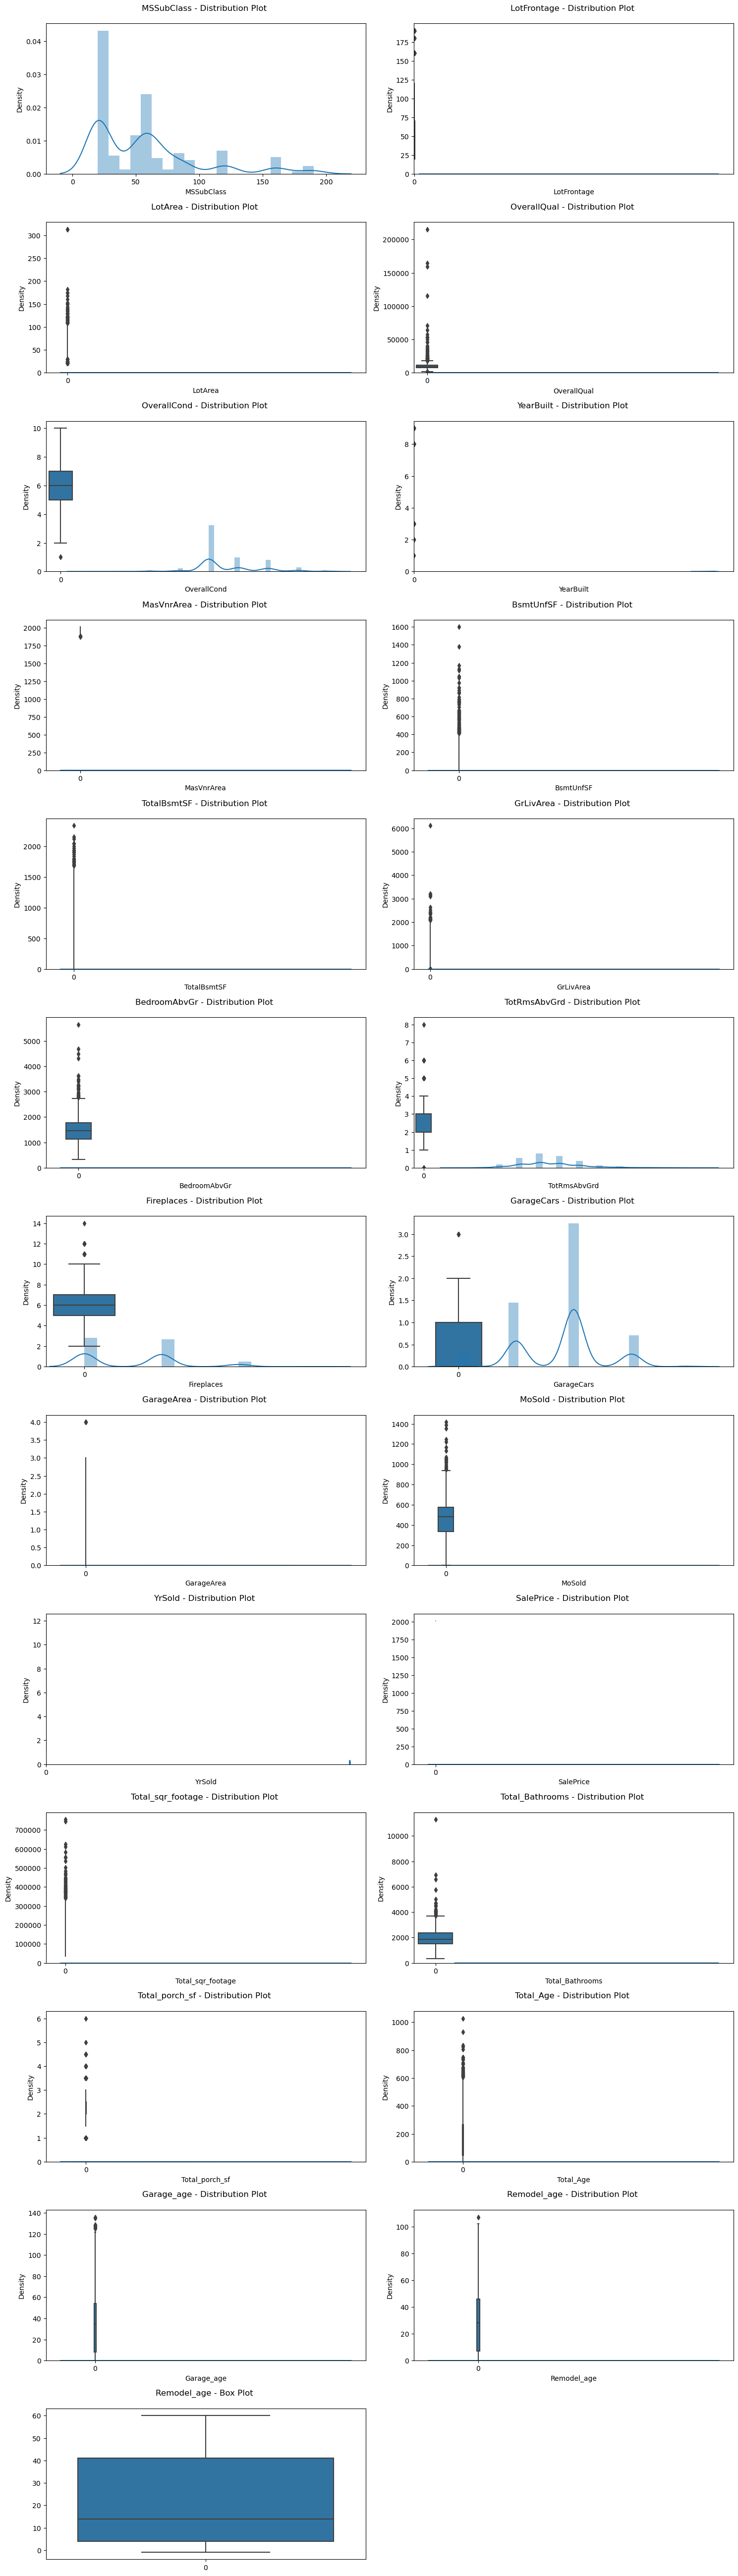

In [31]:
plt.figure(figsize=(15, 100))
for index, column in enumerate(numeric_cols, start=1):
    plt.subplot(25, 2, index)
    plt.title(f"{column} - Distribution Plot \n")
    sns.distplot(house_df[column])
    
    index += 1
    plt.subplot(25, 2, index)
    plt.title(f"{column} - Box Plot \n")
    sns.boxplot(house_df[column])
    
plt.tight_layout()
plt.show()

In [32]:
outlier_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'Total_sqr_footage', 'Total_porch_sf']

for column in outlier_cols:
    qnt = house_df[column].quantile(0.98)
    house_df = house_df[house_df[column] < qnt]

In [33]:
print("The size of the data frame after removing outliers: " , house_df.shape)

The size of the data frame after removing outliers:  (1290, 50)


#### Inference: Additionally, outliers are observed in several other variables; however, they will not be eliminated to avoid potential data loss. Instead, outliers will be addressed during min-max scaling (normalization) as handling them directly might result in loss of data.

## iii. Bivariate analysis : categorical data

> In this analysis, the target variable is SalePrice, which will be compared against other variables. To examine the relationship between the target variable and categorical variables, we will utilize box plots.

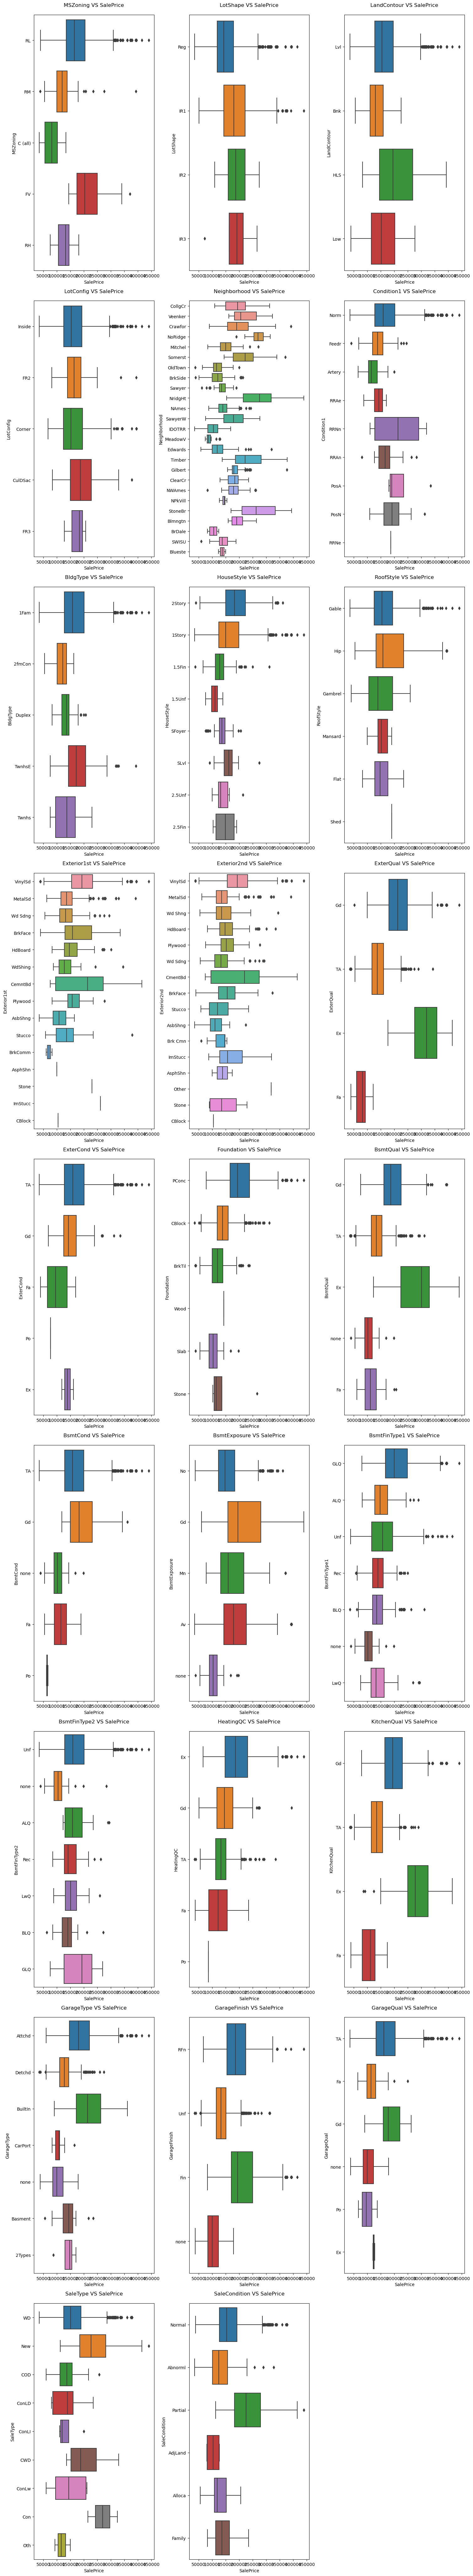

In [34]:
plt.figure(figsize=(15, 100))
counter = 0

for column in categorical_cols:
    counter += 1
    plt.subplot(11, 3, counter)
    sns.boxplot(x='SalePrice', y=house_df[column], data=house_df)
    plt.title(f"{column} VS SalePrice\n")

plt.tight_layout()
plt.show() 


## iv. Bivariate analysis : numeric data

In [35]:
required_numeric_cols = ['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars','GarageArea','SalePrice','Total_sqr_footage','Total_Bathrooms','Total_Age','Garage_age','Remodel_age']

<Figure size 7000x9000 with 0 Axes>

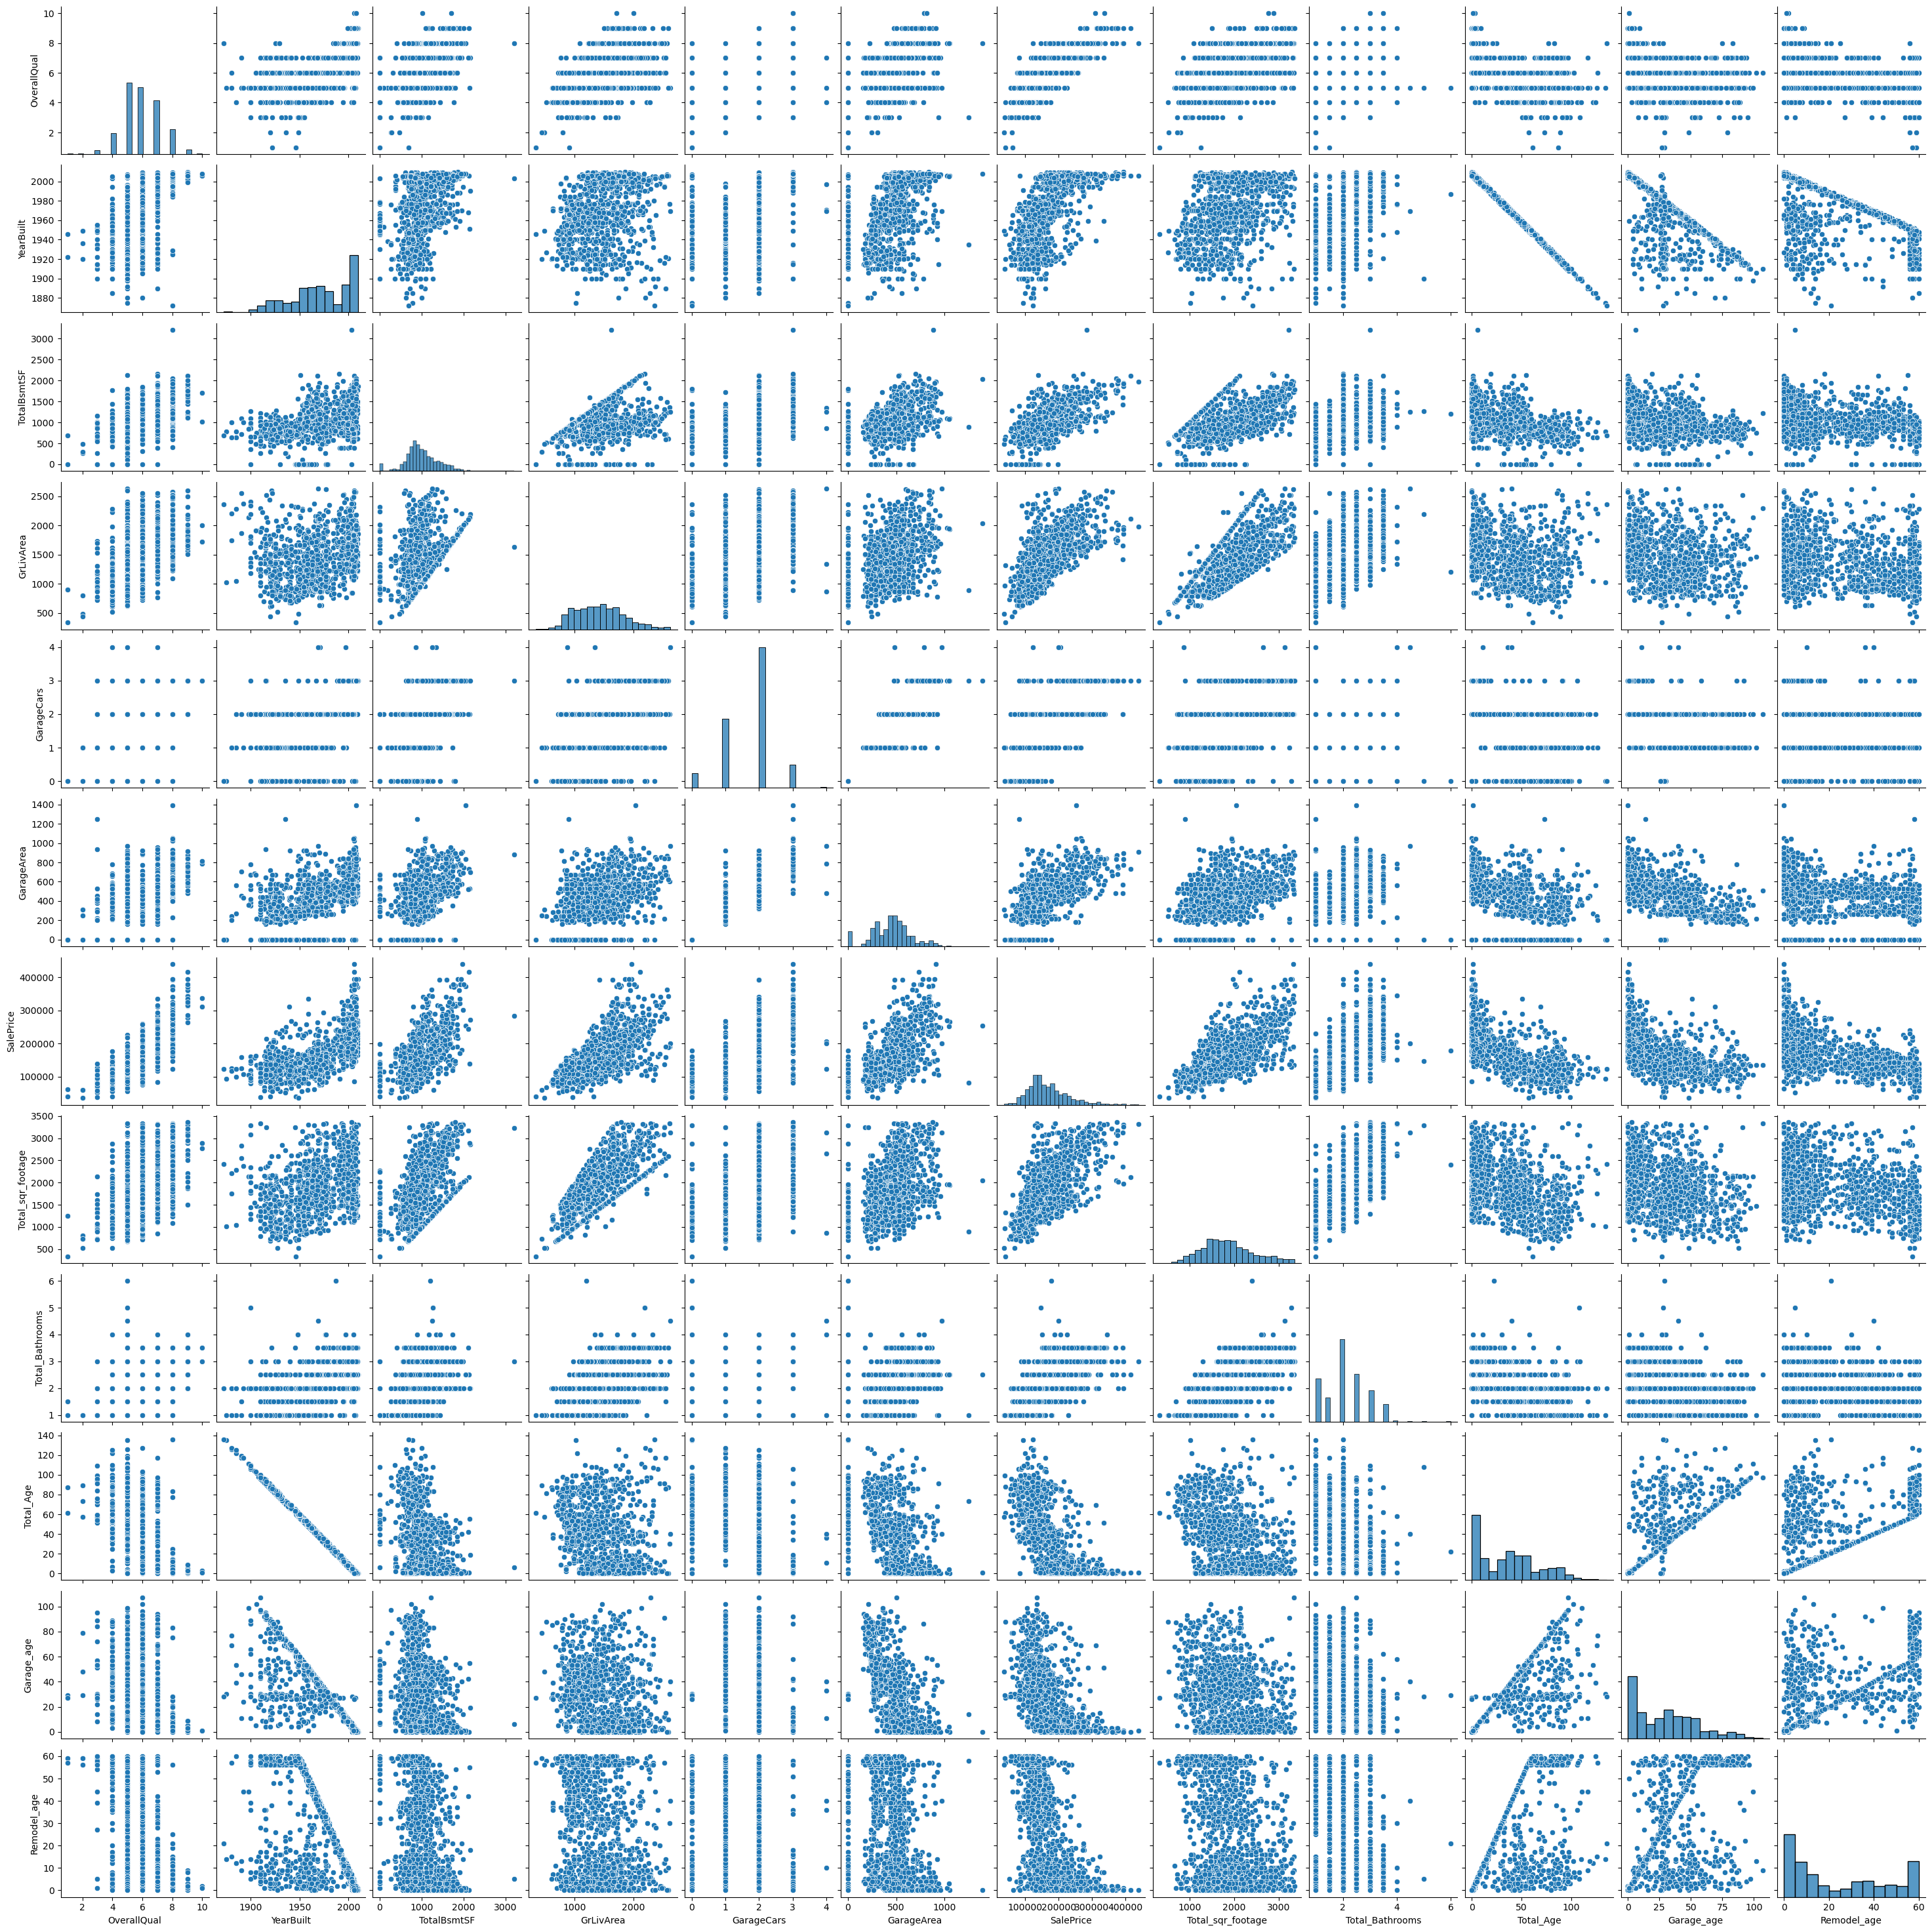

In [36]:
plt.figure(figsize = (70, 90))
sns.pairplot(house_df, vars= required_numeric_cols)
plt.show()

#### Inference: Observations:
- A correlation emerges between Remodel_age and Total_age.
- It's evident that SalesPrice rises as Total_sqr_footage increases, which is to be expected.
- There's a noticeable uptick in SalesPrice corresponding to the increase in GrLivArea.

## v. Multivariate Analysis : Heat Map

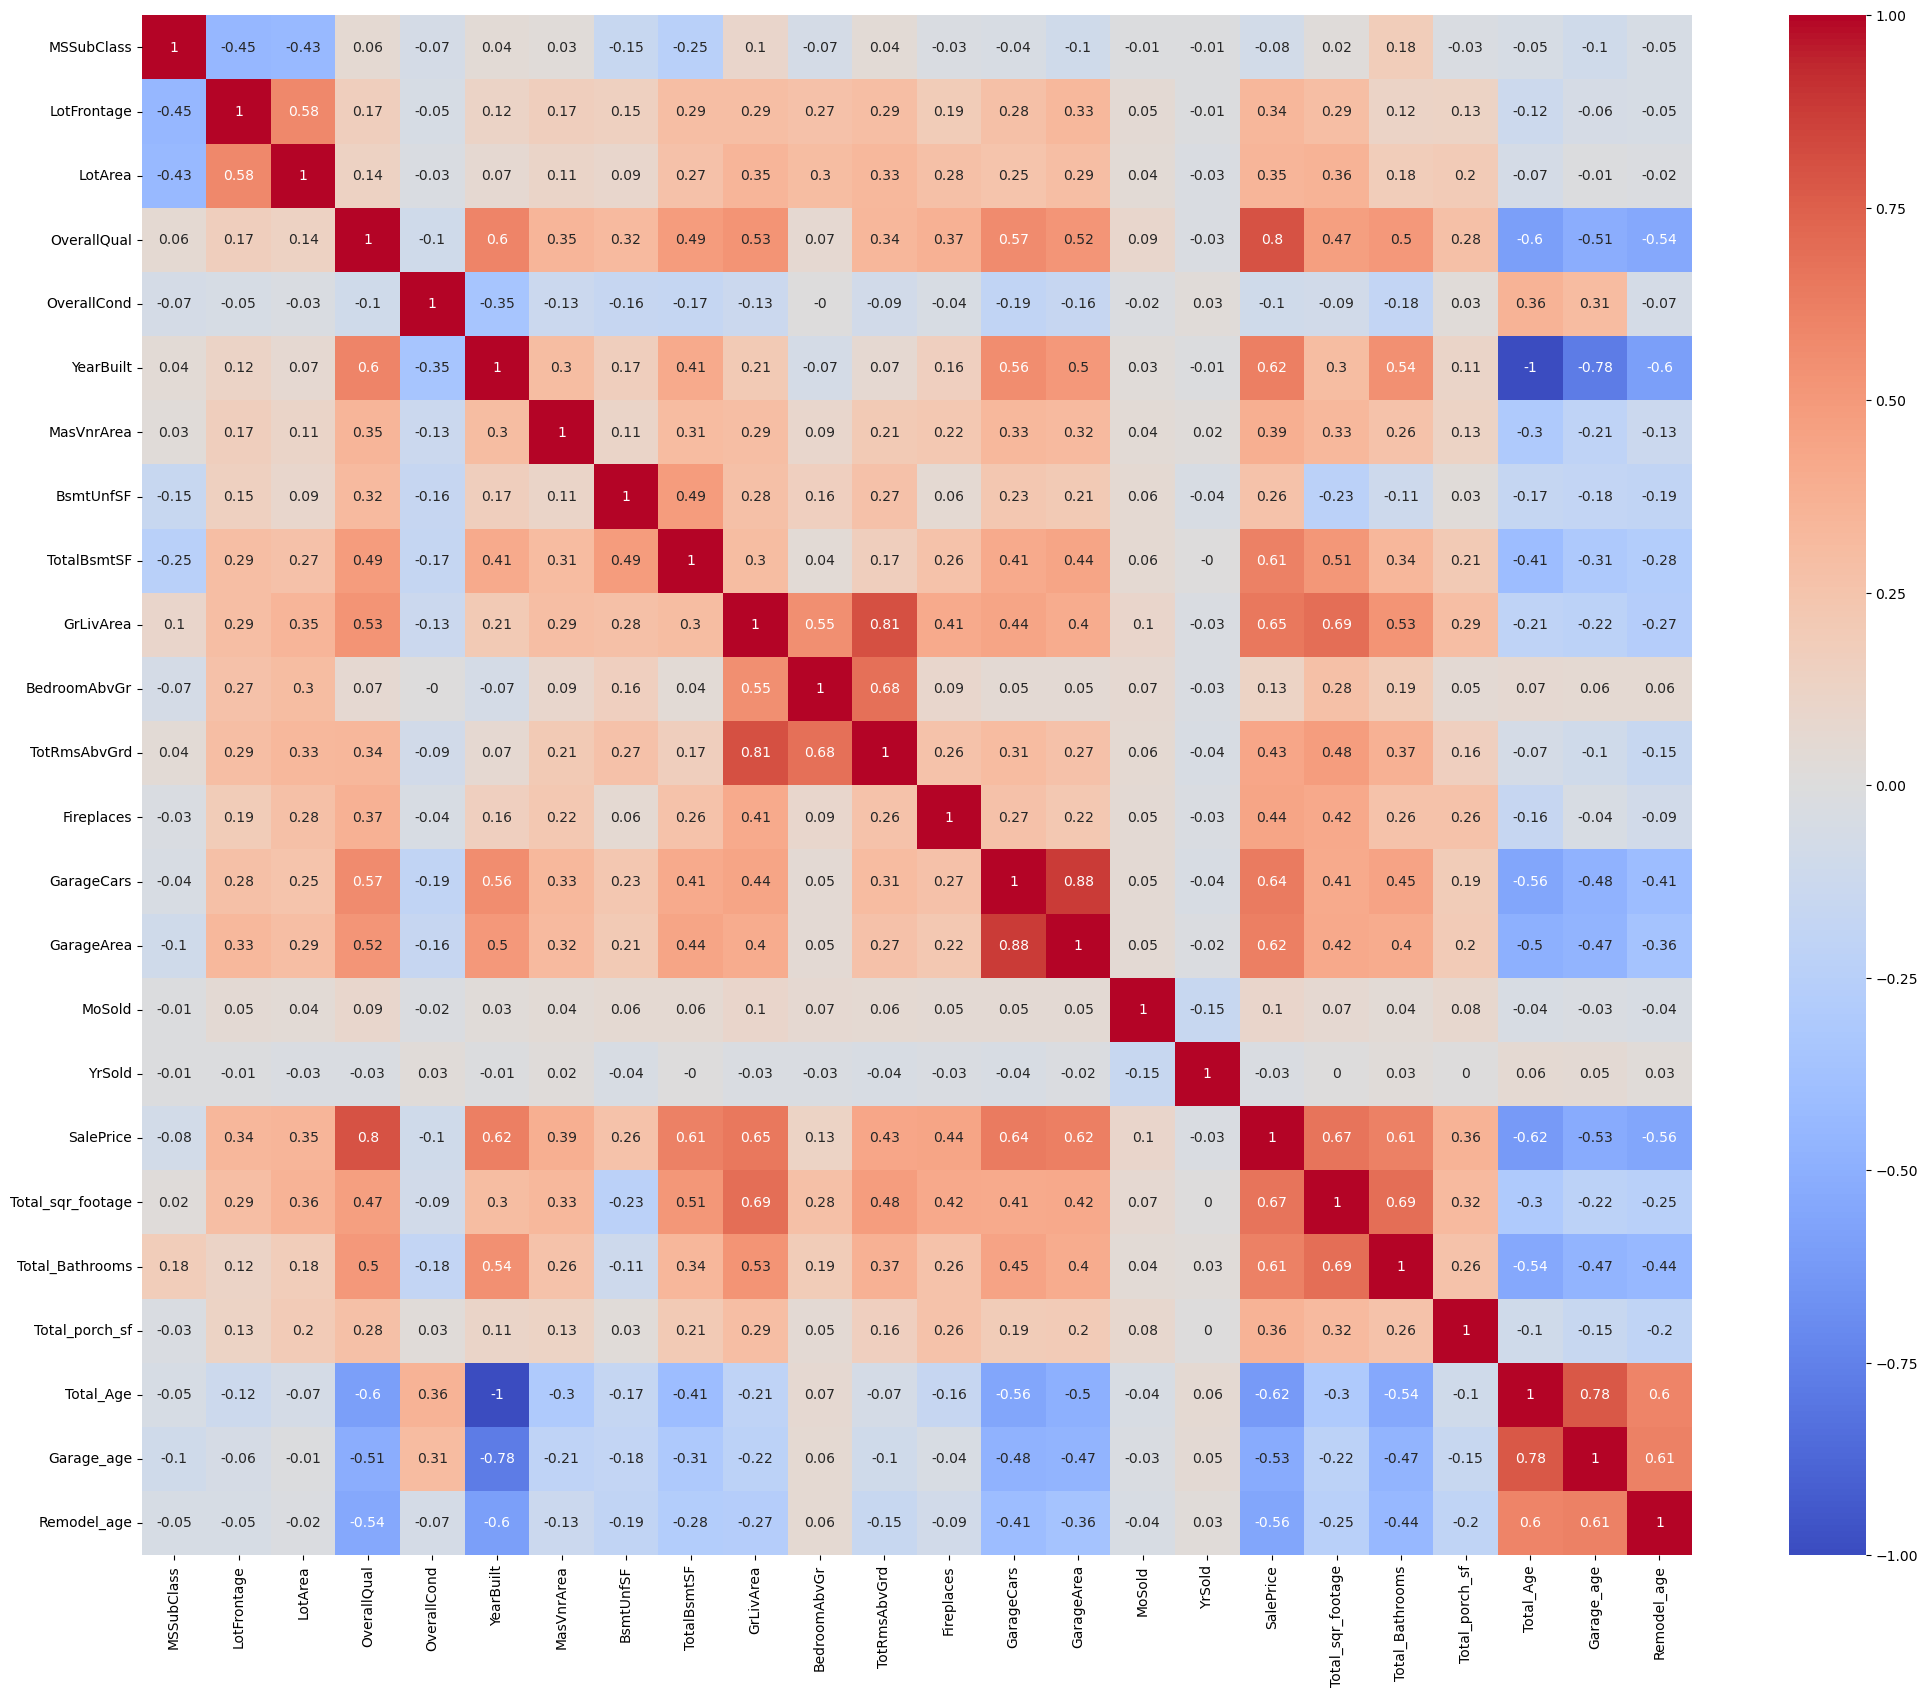

In [37]:
plt.subplots(figsize = (25,20))

sns.heatmap(round(house_df[numeric_cols].corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()
    
    

#### Inference:
- GarageArea and GarageCars exhibit a strong correlation as they both indicate size.
- There's a strong correlation between TotRmsAbvGrd and GrLivArea.
- GarageAge and TotalAge also show a significant correlation. Due to their high correlation, one of these pairs needs to be dropped during model preparation using p-value and VIF for assistance.

# 4. Data Preparation

## i. Creating Dummy Variables for Categorical Columns

In [38]:
house_df = pd.get_dummies(house_df,drop_first=True)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1458
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(161), float64(4), int64(20)
memory usage: 454.8 KB


In [39]:
house_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...           False   
1         0.0        284         1262       1262  ...           False   
2       162.0        434          920       1786  ...           False   
3         0.0        540          756       1717  ...           False   
4       350.0        490         1145       2198  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 185 columns]

In [40]:
print("The size of the data frame after creating dummy variables: " , house_df.shape)

The size of the data frame after creating dummy variables:  (1290, 185)


## ii. Train Test Split

In [41]:
# Replace all boolean variables
house_df = house_df.replace({True: 1, False: 0})

In [42]:
df_train, df_test = train_test_split(house_df, train_size = 0.7, random_state = 100)

In [43]:
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (902, 185)
The Size of Test data is (388, 185)


## iii. Feature Scaling

In [44]:
# feature scale numeric colums
Scaler = MinMaxScaler() # Instantiate an objectr
df_train[numeric_cols] = Scaler.fit_transform(df_train[numeric_cols])

# 5. Model Training

In [45]:
# training set
y_train = df_train.pop('SalePrice') 
X_train = df_train

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 715 to 900
Columns: 184 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), int64(161)
memory usage: 1.3 MB


In [47]:
# test set
y_test = df_test.pop('SalePrice') 
X_test = df_test

## i. Recursive Feature Elimination (RFE)

### a. Model-1

In [48]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 77),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 68),
 ('TotRmsAbvGrd', False, 81),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 12),
 ('MoSold', False, 90),
 ('YrSold', True, 1),
 ('Total_sqr_footage', False, 58),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', False, 64),
 ('Remodel_age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 55),
 ('LotShape_IR3', False, 3),
 ('LotShape_Reg', False, 84),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', False, 8),
 ('LandContour_Lvl', False, 42),
 ('LotConfig_CulDSac', False, 26),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', Tr

In [49]:
# creating X_train using RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]] 
X_train_rfe = sm.add_constant(X_train_rfe) 
X_train_rfe.shape

(902, 95)

In [50]:
# run the model

lm = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:15:42   Log-Likelihood:                 1604.3
No. Observations:                 902   AIC:                            -3039.
Df Residuals:                     817   BIC:                            -2630.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [52]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) 
vif

Features    VIF
85      GarageFinish_none    inf
55     Exterior1st_CBlock    inf
68          BsmtQual_none    inf
69          BsmtCond_none    inf
15              Total_Age    inf
74      BsmtFinType1_none    inf
12                 YrSold    inf
84        GarageType_none    inf
59     Exterior2nd_CBlock    inf
86          GarageQual_Fa    inf
87          GarageQual_Gd    inf
88          GarageQual_Po    inf
5               YearBuilt    inf
89          GarageQual_TA    inf
90        GarageQual_none    inf
79      GarageType_Attchd  85.44
83      GarageType_Detchd  71.18
47        RoofStyle_Gable  58.57
92           SaleType_New  56.81
94  SaleCondition_Partial  56.32
49          RoofStyle_Hip  54.42
60    Exterior2nd_CmentBd  39.79
56    Exterior1st_CemntBd  39.46
71      BsmtExposure_none  30.68
19            MSZoning_RL  27.92
20            MSZoning_RM  21.37
81     GarageType_BuiltIn  18.43
67            BsmtQual_TA  11.78
78         KitchenQual_TA  10.15
66            BsmtQual_Gd   8.08
17            MSZoning_FV   8.07
77         KitchenQual_Gd   8.04
48      RoofStyle_Gambrel   4.64
8             TotalBsmtSF   4.32
3             OverallQual   3.91
1              MSSubClass   3.61
13        Total_Bathrooms   3.58
11             GarageCars   3.49
9               GrLivArea   3.48
82     GarageType_CarPort   3.47
46        BldgType_TwnhsE   3.34
50      RoofStyle_Mansard   3.15
80     GarageType_Basment   3.06
31     Neighborhood_NAmes   3.04
7               BsmtUnfSF   2.97
16            Remodel_age   2.91
18            MSZoning_RH   2.89
26   Neighborhood_CollgCr   2.70
65            BsmtQual_Fa   2.70
76         KitchenQual_Fa   2.52
34   Neighborhood_OldTown   2.38
2                 LotArea   2.25
29   Neighborhood_Gilbert   2.11
72       BsmtFinType1_GLQ   2.10
45         BldgType_Twnhs   2.04
28   Neighborhood_Edwards   1.98
33   Neighborhood_NridgHt   1.92
32    Neighborhood_NWAmes   1.91
44        BldgType_Duplex   1.89
54    Exterior1st_BrkFace   1.87
36    Neighborhood_Sawyer   1.84
58    Exterior2nd_BrkFace   1.79
27   Neighborhood_Crawfor   1.77
4             OverallCond   1.75
37   Neighborhood_SawyerW   1.70
10             Fireplaces   1.64
6              MasVnrArea   1.59
30   Neighborhood_Mitchel   1.59
39    Neighborhood_Timber   1.54
53    Exterior1st_BrkComm   1.54
51         RoofStyle_Shed   1.54
35     Neighborhood_SWISU   1.44
42        Condition1_RRAe   1.39
40        Condition1_Norm   1.37
70        BsmtExposure_Gd   1.37
38   Neighborhood_StoneBr   1.36
14         Total_porch_sf   1.34
21        LandContour_HLS   1.33
43        Condition1_RRNn   1.30
93  SaleCondition_AdjLand   1.30
23          LotConfig_FR3   1.27
75           HeatingQC_Po   1.22
25   Neighborhood_ClearCr   1.17
41        Condition1_PosN   1.16
73       BsmtFinType1_LwQ   1.15
63    Exterior2nd_Wd Shng   1.13
52    Exterior1st_AsphShn   1.10
22          LotConfig_FR2   1.10
62      Exterior2nd_Stone   1.08
91           SaleType_CWD   1.07
64        Foundation_Wood   1.06
0                   const   0.00
24   Neighborhood_Blueste    NaN
57      Exterior1st_Stone    NaN
61      Exterior2nd_Other    NaN

## ii. Ridge - Regularization

In [53]:
# aplhas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026842        -0.032441                1
14         3.0         -0.027309        -0.032542                2
12         1.0         -0.026369        -0.032672                3
11         0.9         -0.026322        -0.032744                4
15         4.0         -0.027766        -0.032783                5
10         0.8         -0.026272        -0.032833                6
9          0.7         -0.026221        -0.032940                7
8          0.6         -0.026170        -0.033067                8
16         5.0         -0.028208        -0.033096                9
7          0.5         -0.026117        -0.033211               10
6          0.4         -0.026061        -0.033377               11
17         6.0         -0.028654        -0.033416               12
5          0.3         -0.026002        -0.033575               13
18         7.0         -0.029085        -0.033756               14
4          0.2         -0.025944        -0.033816               15
19         8.0         -0.029504        -0.034107               16
3          0.1         -0.025881        -0.034126               17
20         9.0         -0.029915        -0.034442               18
2         0.01         -0.025806        -0.034600               19
1        0.001         -0.025801        -0.034695               20
0       0.0001         -0.025801        -0.034706               21
21        10.0         -0.030315        -0.034768               22
22          20         -0.033635        -0.037688               23
23          50         -0.040091        -0.043491               24
24         100         -0.046509        -0.049270               25
25         500         -0.064864        -0.066312               26

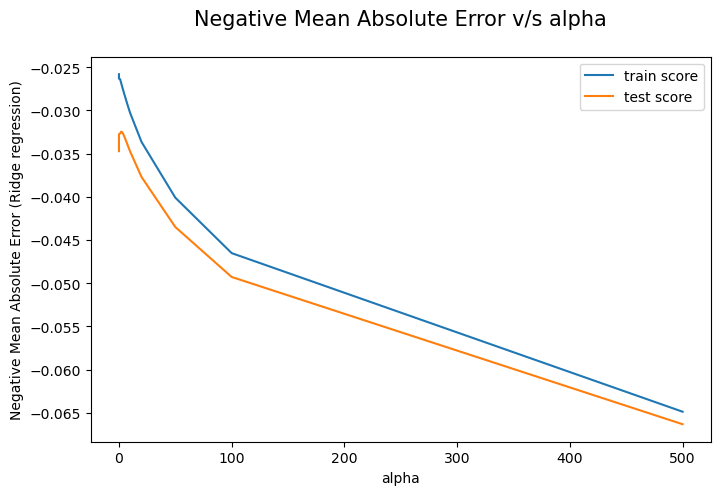

In [55]:
# plotting negative mean absolute error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error v/s alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
ridge_model_cv.best_params_

{'alpha': 2.0}

In [57]:
# hyperparameter tuning
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-3.21931923e-02,  7.85843704e-03,  5.82671972e-02,  1.26976120e-01,
        8.23175599e-02,  5.67571294e-02,  1.99268779e-02,  2.09198269e-02,
        6.23081353e-02,  1.13820405e-01, -6.54432664e-03,  2.72273116e-02,
        3.82755886e-02,  3.34416699e-02,  2.20713172e-02,  1.59400923e-03,
        3.41741924e-03,  1.31104375e-01,  3.59212877e-02,  3.24575744e-02,
       -5.74912807e-02, -1.21790804e-02, -2.27994732e-02,  2.89196964e-02,
       -2.86186474e-03,  2.44979327e-02,  7.43684514e-03, -1.06800405e-03,
       -7.54380694e-03,  1.30308528e-04,  1.64217845e-02, -1.86382702e-02,
       -4.38977767e-03,  1.28959598e-02, -1.79331009e-02, -1.10001071e-02,
       -1.07963324e-03,  0.00000000e+00,  1.11633589e-02,  1.21945906e-02,
       -2.16740931e-02, -2.07947999e-02,  4.86432936e-02, -3.33308585e-02,
       -2.95219090e-02,  3.70039144e-04, -3.13100232e-03, -3.92725656e-02,
       -2.46769505e-02,  1.88424499e-02, -2.35927473e-02,  1.25823193e-02,
        4.19983501e-02, -

In [58]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0322
1              LotFrontage       0.0079
2                  LotArea       0.0583
3              OverallQual       0.1270
4              OverallCond       0.0823
5                YearBuilt       0.0568
6               MasVnrArea       0.0199
7                BsmtUnfSF       0.0209
8              TotalBsmtSF       0.0623
9                GrLivArea       0.1138
10            BedroomAbvGr      -0.0065
11            TotRmsAbvGrd       0.0272
12              Fireplaces       0.0383
13              GarageCars       0.0334
14              GarageArea       0.0221
15                  MoSold       0.0016
16                  YrSold       0.0034
17       Total_sqr_footage       0.1311
18         Total_Bathrooms       0.0359
19          Total_porch_sf       0.0325
20               Total_Age      -0.0575
21              Garage_age      -0.0122
22             Remodel_age      -0.0228
23             MSZoning_FV       0.0289
24             MSZoning_RH      -0.0029
25             MSZoning_RL       0.0245
26             MSZoning_RM       0.0074
27            LotShape_IR2      -0.0011
28            LotShape_IR3      -0.0075
29            LotShape_Reg       0.0001
30         LandContour_HLS       0.0164
31         LandContour_Low      -0.0186
32         LandContour_Lvl      -0.0044
33       LotConfig_CulDSac       0.0129
34           LotConfig_FR2      -0.0179
35           LotConfig_FR3      -0.0110
36        LotConfig_Inside      -0.0011
37    Neighborhood_Blueste       0.0000
38     Neighborhood_BrDale       0.0112
39    Neighborhood_BrkSide       0.0122
40    Neighborhood_ClearCr      -0.0217
41    Neighborhood_CollgCr      -0.0208
42    Neighborhood_Crawfor       0.0486
43    Neighborhood_Edwards      -0.0333
44    Neighborhood_Gilbert      -0.0295
45     Neighborhood_IDOTRR       0.0004
46    Neighborhood_MeadowV      -0.0031
47    Neighborhood_Mitchel      -0.0393
48      Neighborhood_NAmes      -0.0247
49    Neighborhood_NPkVill       0.0188
50     Neighborhood_NWAmes      -0.0236
51    Neighborhood_NoRidge       0.0126
52    Neighborhood_NridgHt       0.0420
53    Neighborhood_OldTown      -0.0121
54      Neighborhood_SWISU      -0.0158
55     Neighborhood_Sawyer      -0.0145
56    Neighborhood_SawyerW       0.0001
57    Neighborhood_Somerst       0.0178
58    Neighborhood_StoneBr       0.0876
59     Neighborhood_Timber      -0.0212
60    Neighborhood_Veenker       0.0099
61        Condition1_Feedr       0.0063
62         Condition1_Norm       0.0234
63         Condition1_PosA       0.0011
64         Condition1_PosN       0.0409
65         Condition1_RRAe      -0.0361
66         Condition1_RRAn       0.0050
67         Condition1_RRNe       0.0006
68         Condition1_RRNn       0.0155
69         BldgType_2fmCon      -0.0065
70         BldgType_Duplex      -0.0253
71          BldgType_Twnhs      -0.0350
72         BldgType_TwnhsE      -0.0262
73       HouseStyle_1.5Unf       0.0016
74       HouseStyle_1Story      -0.0016
75       HouseStyle_2.5Fin       0.0033
76       HouseStyle_2.5Unf      -0.0148
77       HouseStyle_2Story      -0.0010
78       HouseStyle_SFoyer      -0.0055
79         HouseStyle_SLvl      -0.0043
80         RoofStyle_Gable       0.0106
81       RoofStyle_Gambrel       0.0269
82           RoofStyle_Hip       0.0124
83       RoofStyle_Mansard       0.0194
84          RoofStyle_Shed      -0.0133
85     Exterior1st_AsphShn      -0.0069
86     Exterior1st_BrkComm      -0.0014
87     Exterior1st_BrkFace       0.0385
88      Exterior1st_CBlock      -0.0035
89     Exterior1st_CemntBd      -0.0164
90     Exterior1st_HdBoard      -0.0137
91     Exterior1st_ImStucc       0.0036
92     Exterior1st_MetalSd       0.0021
93     Exterior1st_Plywood      -0.0077
94       Exterior1st_Stone       0.0000
95      Exterior1st_Stucco       0.0160
96     Exterior1st_VinylSd      -0.0134
97     Exterior1st_Wd Sdng      -0.0133
98     Exterior1st_WdShing      -0.0019
99     Exterior2nd

In [59]:
# dictionary of Features and Coefficients

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0322,
 'LotFrontage': 0.0079,
 'LotArea': 0.0583,
 'OverallQual': 0.127,
 'OverallCond': 0.0823,
 'YearBuilt': 0.0568,
 'MasVnrArea': 0.0199,
 'BsmtUnfSF': 0.0209,
 'TotalBsmtSF': 0.0623,
 'GrLivArea': 0.1138,
 'BedroomAbvGr': -0.0065,
 'TotRmsAbvGrd': 0.0272,
 'Fireplaces': 0.0383,
 'GarageCars': 0.0334,
 'GarageArea': 0.0221,
 'MoSold': 0.0016,
 'YrSold': 0.0034,
 'Total_sqr_footage': 0.1311,
 'Total_Bathrooms': 0.0359,
 'Total_porch_sf': 0.0325,
 'Total_Age': -0.0575,
 'Garage_age': -0.0122,
 'Remodel_age': -0.0228,
 'MSZoning_FV': 0.0289,
 'MSZoning_RH': -0.0029,
 'MSZoning_RL': 0.0245,
 'MSZoning_RM': 0.0074,
 'LotShape_IR2': -0.0011,
 'LotShape_IR3': -0.0075,
 'LotShape_Reg': 0.0001,
 'LandContour_HLS': 0.0164,
 'LandContour_Low': -0.0186,
 'LandContour_Lvl': -0.0044,
 'LotConfig_CulDSac': 0.0129,
 'LotConfig_FR2': -0.0179,
 'LotConfig_FR3': -0.011,
 'LotConfig_Inside': -0.0011,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': 0.0112,
 'Neighborhood_BrkSide

In [60]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [61]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

ridge_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
ridge_df = ridge_df.loc[ridge_df['rfe_support'] == True]
ridge_df.reset_index(drop=True, inplace=True)

ridge_df['Coefficient'] = ridge_df['Features'].apply(find)
ridge_df = ridge_df.sort_values(by=['Coefficient'], ascending=False)
ridge_df = ridge_df.head(10)
ridge_df

Features  rfe_support  rfe_ranking  Coefficient
0         OverallQual         True            1       0.1270
2         TotalBsmtSF         True            1       0.0623
1           YearBuilt         True            1       0.0568
18      GarageQual_TA         True            1       0.0091
16      GarageQual_Gd         True            1       0.0091
3              YrSold         True            1       0.0034
14  GarageFinish_none         True            1       0.0029
13    GarageType_none         True            1       0.0029
19    GarageQual_none         True            1       0.0029
9   Exterior2nd_Other         True            1       0.0000

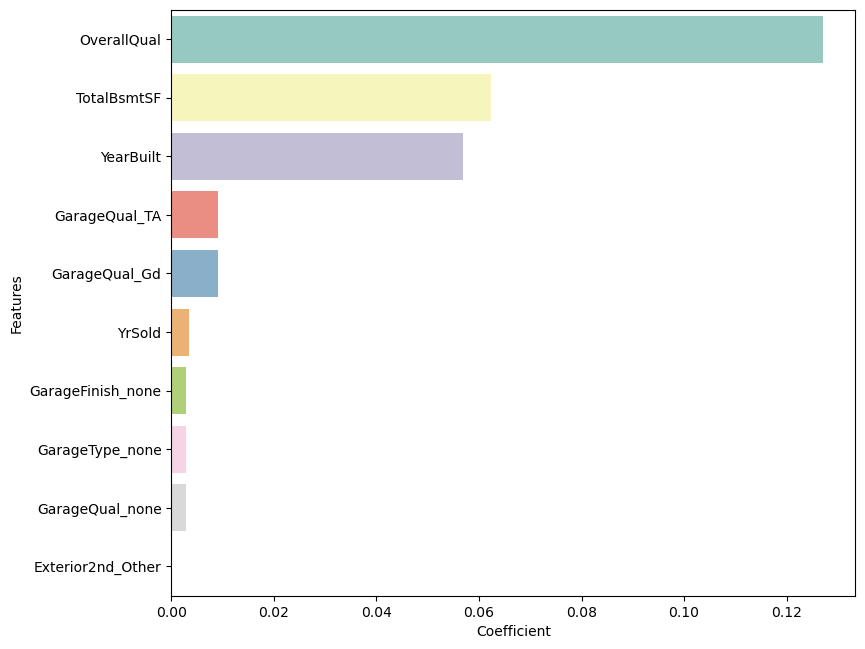

In [62]:
# bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = ridge_df)
plt.show()

## iii. Lasso - Regularization

In [63]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
#mean scores

lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.027511        -0.032564                1
1       0.0002         -0.028520        -0.032906                2
2       0.0003         -0.029430        -0.033546                3
3       0.0004         -0.030189        -0.034173                4
4       0.0005         -0.030934        -0.034869                5
5        0.001         -0.034743        -0.038518                6
6        0.002         -0.040697        -0.043658                7
7        0.003         -0.045118        -0.047489                8
8        0.004         -0.049066        -0.051215                9
9        0.005         -0.052732        -0.054679               10
10        0.01         -0.068260        -0.069501               11

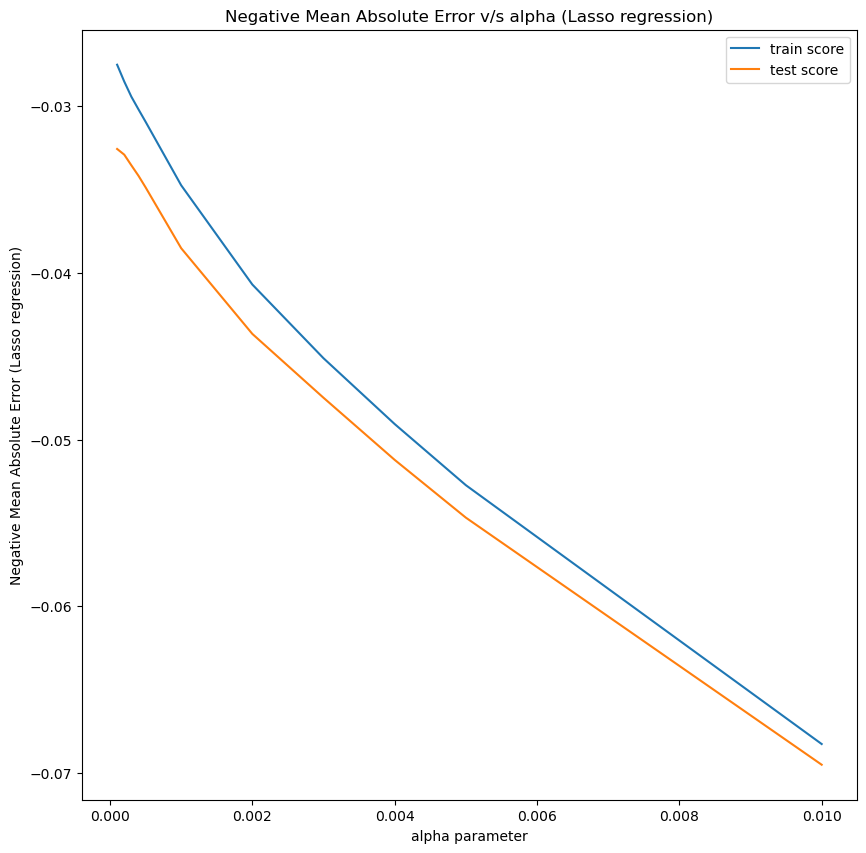

In [65]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,10))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error v/s alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [66]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [67]:
# hyperparameter for lambda = 0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.13549379e-02,  2.04791533e-03,  5.89710666e-02,  1.64447488e-01,
        9.45608893e-02,  1.34895481e-01,  1.54255394e-02,  0.00000000e+00,
        9.33338351e-02,  1.52079104e-01, -0.00000000e+00,  8.55304509e-04,
        3.30695298e-02,  4.24110576e-02,  4.53949751e-03,  0.00000000e+00,
        9.08276382e-04,  1.20521962e-01,  2.02746685e-02,  3.10001916e-02,
       -0.00000000e+00, -1.15676929e-02, -1.92251342e-02,  1.96346541e-02,
       -2.33398785e-03,  1.61819080e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.04928839e-04,  1.44041187e-02, -1.00205367e-02,
       -0.00000000e+00,  1.21071629e-02, -1.31064333e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.29792979e-02,
       -1.00726502e-02, -1.57590089e-02,  5.07930240e-02, -2.61668610e-02,
       -2.28077807e-02,  9.68490782e-04, -0.00000000e+00, -3.83118793e-02,
       -2.05350165e-02,  7.74351868e-03, -2.08804667e-02,  6.12912253e-03,
        4.45427059e-02, -

In [68]:
# predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9271004938297533


In [69]:
# features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0               MSSubClass      -0.0414
1              LotFrontage       0.0020
2                  LotArea       0.0590
3              OverallQual       0.1644
4              OverallCond       0.0946
5                YearBuilt       0.1349
6               MasVnrArea       0.0154
7              TotalBsmtSF       0.0933
8                GrLivArea       0.1521
9             TotRmsAbvGrd       0.0009
10              Fireplaces       0.0331
11              GarageCars       0.0424
12              GarageArea       0.0045
13                  YrSold       0.0009
14       Total_sqr_footage       0.1205
15         Total_Bathrooms       0.0203
16          Total_porch_sf       0.0310
17              Garage_age      -0.0116
18             Remodel_age      -0.0192
19             MSZoning_FV       0.0196
20             MSZoning_RH      -0.0023
21             MSZoning_RL       0.0162
22            LotShape_Reg       0.0001
23         LandContour_HLS       0.0144
24         LandContour_Low      -0.0100
25       LotConfig_CulDSac       0.0121
26           LotConfig_FR2      -0.0131
27    Neighborhood_BrkSide       0.0130
28    Neighborhood_ClearCr      -0.0101
29    Neighborhood_CollgCr      -0.0158
30    Neighborhood_Crawfor       0.0508
31    Neighborhood_Edwards      -0.0262
32    Neighborhood_Gilbert      -0.0228
33     Neighborhood_IDOTRR       0.0010
34    Neighborhood_Mitchel      -0.0383
35      Neighborhood_NAmes      -0.0205
36    Neighborhood_NPkVill       0.0077
37     Neighborhood_NWAmes      -0.0209
38    Neighborhood_NoRidge       0.0061
39    Neighborhood_NridgHt       0.0445
40    Neighborhood_OldTown      -0.0105
41      Neighborhood_SWISU      -0.0073
42     Neighborhood_Sawyer      -0.0103
43    Neighborhood_SawyerW       0.0003
44    Neighborhood_Somerst       0.0197
45    Neighborhood_StoneBr       0.0956
46     Neighborhood_Timber      -0.0103
47         Condition1_Norm       0.0176
48         Condition1_PosN       0.0315
49         Condition1_RRAe      -0.0412
50         BldgType_Duplex      -0.0211
51          BldgType_Twnhs      -0.0268
52         BldgType_TwnhsE      -0.0181
53       HouseStyle_1Story      -0.0021
54       HouseStyle_2.5Unf      -0.0056
55       RoofStyle_Gambrel       0.0168
56     Exterior1st_BrkFace       0.0363
57     Exterior1st_HdBoard      -0.0091
58     Exterior1st_MetalSd       0.0006
59     Exterior1st_Plywood      -0.0006
60      Exterior1st_Stucco       0.0056
61     Exterior1st_Wd Sdng      -0.0053
62     Exterior2nd_BrkFace      -0.0137
63     Exterior2nd_CmentBd       0.0160
64     Exterior2nd_HdBoard      -0.0001
65     Exterior2nd_Plywood      -0.0133
66     Exterior2nd_Wd Sdng       0.0037
67     Exterior2nd_Wd Shng      -0.0129
68            ExterQual_Fa      -0.0020
69            ExterQual_Gd      -0.0069
70            ExterQual_TA      -0.0166
71            ExterCond_Fa       0.0007
72            ExterCond_Gd      -0.0126
73        Foundation_PConc       0.0071
74             BsmtQual_Fa      -0.0292
75             BsmtQual_Gd      -0.0501
76             BsmtQual_TA      -0.0407
77             BsmtCond_Gd       0.0030
78             BsmtCond_TA       0.0137
79         BsmtExposure_Gd       0.0367
80         BsmtExposure_Mn      -0.0034
81         BsmtExposure_No      -0.0074
82       BsmtExposure_none      -0.0088
83        BsmtFinType1_BLQ      -0.0029
84        BsmtFinType1_GLQ       0.0104
85        BsmtFinType1_LwQ      -0.0223
86        BsmtFinType1_Rec      -0.0055
87        BsmtFinType1_Unf       0.0001
88        BsmtFinType2_BLQ       0.0040
89        BsmtFinType2_LwQ      -0.0063
90        BsmtFinType2_Rec      -0.0086
91        BsmtFinType2_Unf       0.0111
92            HeatingQC_Gd      -0.0091
93            HeatingQC_TA      -0.0065
94          KitchenQual_Fa      -0.0297
95          KitchenQual_Gd      -0.0443
96          KitchenQual_TA      -0.0426
97      GarageType_BuiltIn       0.0012
98      GarageType_CarPort      -0.0072
99       GarageTyp

In [70]:
# dictionary of Features and Coefficients

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.041354937870847985,
 'LotFrontage': 0.0020479153284584987,
 'LotArea': 0.05897106661352969,
 'OverallQual': 0.1644474878714924,
 'OverallCond': 0.0945608892669605,
 'YearBuilt': 0.1348954812175164,
 'MasVnrArea': 0.015425539403898653,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.09333383514535568,
 'GrLivArea': 0.15207910421025508,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.0008553045090203529,
 'Fireplaces': 0.033069529831491,
 'GarageCars': 0.0424110576357687,
 'GarageArea': 0.00453949751190163,
 'MoSold': 0.0,
 'YrSold': 0.0009082763820952655,
 'Total_sqr_footage': 0.1205219615956221,
 'Total_Bathrooms': 0.020274668468214477,
 'Total_porch_sf': 0.0310001916225879,
 'Total_Age': -0.0,
 'Garage_age': -0.011567692913254265,
 'Remodel_age': -0.019225134181186338,
 'MSZoning_FV': 0.019634654133225328,
 'MSZoning_RH': -0.0023339878497272595,
 'MSZoning_RL': 0.016181908011577907,
 'MSZoning_RM': 0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': 0.0001049288391416

In [71]:
# RFE : minimising features to 20

X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [72]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a lasso_df dataframe

lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df = lasso_df.loc[lasso_df['rfe_support'] == True]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df['Coefficient'] = lasso_df['Features'].apply(find)
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df = lasso_df.head(10)
lasso_df

Features  rfe_support  rfe_ranking  Coefficient
1            OverallQual         True            1     0.164447
5              GrLivArea         True            1     0.152079
3              YearBuilt         True            1     0.134895
7      Total_sqr_footage         True            1     0.120522
10  Neighborhood_StoneBr         True            1     0.095633
2            OverallCond         True            1     0.094561
4            TotalBsmtSF         True            1     0.093334
0                LotArea         True            1     0.058971
8   Neighborhood_Crawfor         True            1     0.050793
9   Neighborhood_NridgHt         True            1     0.044543

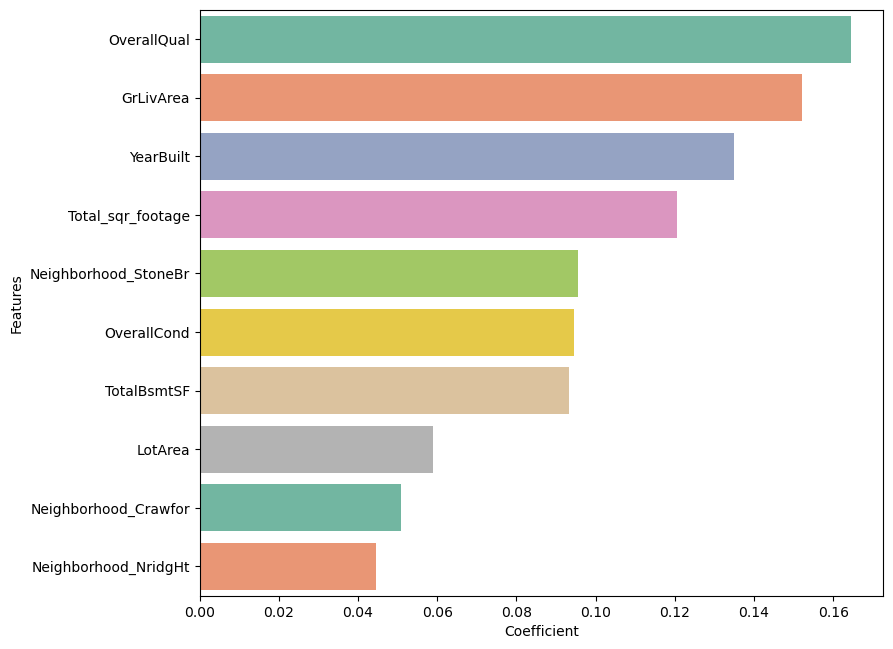

In [73]:
#  bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = lasso_df)
plt.show()

# 6. Conclusion

### The optimal lambda values obtained for Ridge and Lasso are:

- Ridge - 2.0
- Lasso - 0.0001

### Regarding the R2 values:

Ridge - Train: 0.928, Test: 0.902
Lasso - Train: 0.927, Test: 0.913

### The Mean Squared Error for Ridge and Lasso is:

Ridge - 0.00297
Lasso - 0.00280

`It's evident that Lasso's Mean Squared Error is slightly lower than Ridge's. Additionally, Lasso aids in feature reduction by shrinking coefficients toward zero, enhancing model interpretability. This gives Lasso an advantage over Ridge.`

Based on LASSO Regularization, the top 5 predicted variables are:

1. OverallQual - Higher material and finish quality of the house correlates with increased price.
2. GrLivArea - Larger living area square footage corresponds to higher house prices.
3. YearBuilt - Older houses tend to have higher prices.
4. Total_sqr_footage - Greater overall square footage leads to higher house prices.
5. Neighborhood_StoneBr - Houses located in Stone Brook neighborhood generally have higher prices.